# 7. How To Compress Single & Multiple Images In Python

## Learning Outcomes

- To learn how to compress a single image.
- To learn how to compress all images within a specific directory.

------------------------------------------------------

As approximately 65% of today's online content is made of image, decreasing the time your users have to wait to view content is an essential part of your website or application.

This article will show you how to effectively compress your images using Python!

------------------------------------------------------------------------------------------------

## Why Should You Optimise Your Images?

There are three major reasons to optimise your images:
    
1. SEO: Smaller images means that your website or app will load faster, this ensures that users are able to consume either your content or service quickly. Also Google have stated that site speed is a small ranking factor for Google search.
2. Storage: Optimised images are cheaper to store, therefore reducing your operational costs.
3. Bandwidth: Optimised images require less i/o (input / output) bandwidth, which means you can get more out of your existing hosting plans, or AWS/Google Cloud Platform/Digital Ocean plans.

------------------------------------------------------------------------------------

## Image Optimisation In Python

There many libraries that allow you to easily optimise images with Python:

- [Pillow](https://pillow.readthedocs.io/en/stable/) - This library builds on top of PIL and can be used for the following image formats: PNG, PPM, JPEG, GIF, BMP and TIFF.
- [img4web](https://github.com/joedicastro/img4web) - This script optimises .jpg and .png images for the web, after running it you'll receive lossless compression for the images.
- [Tinify](https://github.com/tinify/tinify-python) - This package allows you to easily integrate with tinypng.com for receiving compressed images over an API.
- [Scikit-image](https://scikit-image.org/) - Scikit-learn is a machine learning package, the scikit-image allows for advanced manipulation of images, allowing you to even return the images as numpy arrays!
- [Pyguetzli](https://pypi.org/project/pyguetzli/) - A Python binding for Google’s Guetzli library, which is a JPEG encoder that yields 20-30% smaller images in comparison to libjpeg.

------------

For this tutorial, we will use pillow to do our image compression with python, so [let's install it:](https://pillow.readthedocs.io/en/stable/installation.html#basic-installation)

In [11]:
!python3 -m pip install --upgrade pip
!python3 -m pip install --upgrade Pillow

--------------------------------------------------------------------------------

## How To Open A Single Image In Python

The most important class in Pillow is called: <strong> Image </strong>

In [12]:
from PIL import Image
import PIL
import os
import glob

You can use dir(Image) to see what methods and attributes are available on the Image class:

In [13]:
dir(Image)

['Callable',
 'DECODERS',
 'DEFAULT_STRATEGY',
 'DecompressionBombError',
 'DecompressionBombWarning',
 'DeferredError',
 'Dither',
 'ENCODERS',
 'EXTENSION',
 'ElementTree',
 'Exif',
 'FILTERED',
 'FIXED',
 'HUFFMAN_ONLY',
 'ID',
 'Image',
 'ImageMode',
 'ImagePointHandler',
 'ImageTransformHandler',
 'IntEnum',
 'MAX_IMAGE_PIXELS',
 'MIME',
 'MODES',
 'MutableMapping',
 'OPEN',
 'Palette',
 'Path',
 'Quantize',
 'RLE',
 'Resampling',
 'SAVE',
 'SAVE_ALL',
 'TiffTags',
 'Transform',
 'Transpose',
 'USE_CFFI_ACCESS',
 'UnidentifiedImageError',
 '_E',
 '_ENDIAN',
 '_MAPMODES',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__version__',
 '_apply_env_variables',
 '_check_size',
 '_conv_type_shape',
 '_decompression_bomb_check',
 '_filters_support',
 '_fromarray_typemap',
 '_getdecoder',
 '_getencoder',
 '_getscaleoffset',
 '_initialized',
 '_plugins',
 '_show',
 '_wedge',
 'alpha_composite',
 'atexit',
 

------------------------------------------------------------------------------------

In [14]:
im = Image.open("image-1.jpg")

In [15]:
print(f"The image size dimensions are: {im.size}")

The image size dimensions are: (1920, 1280)


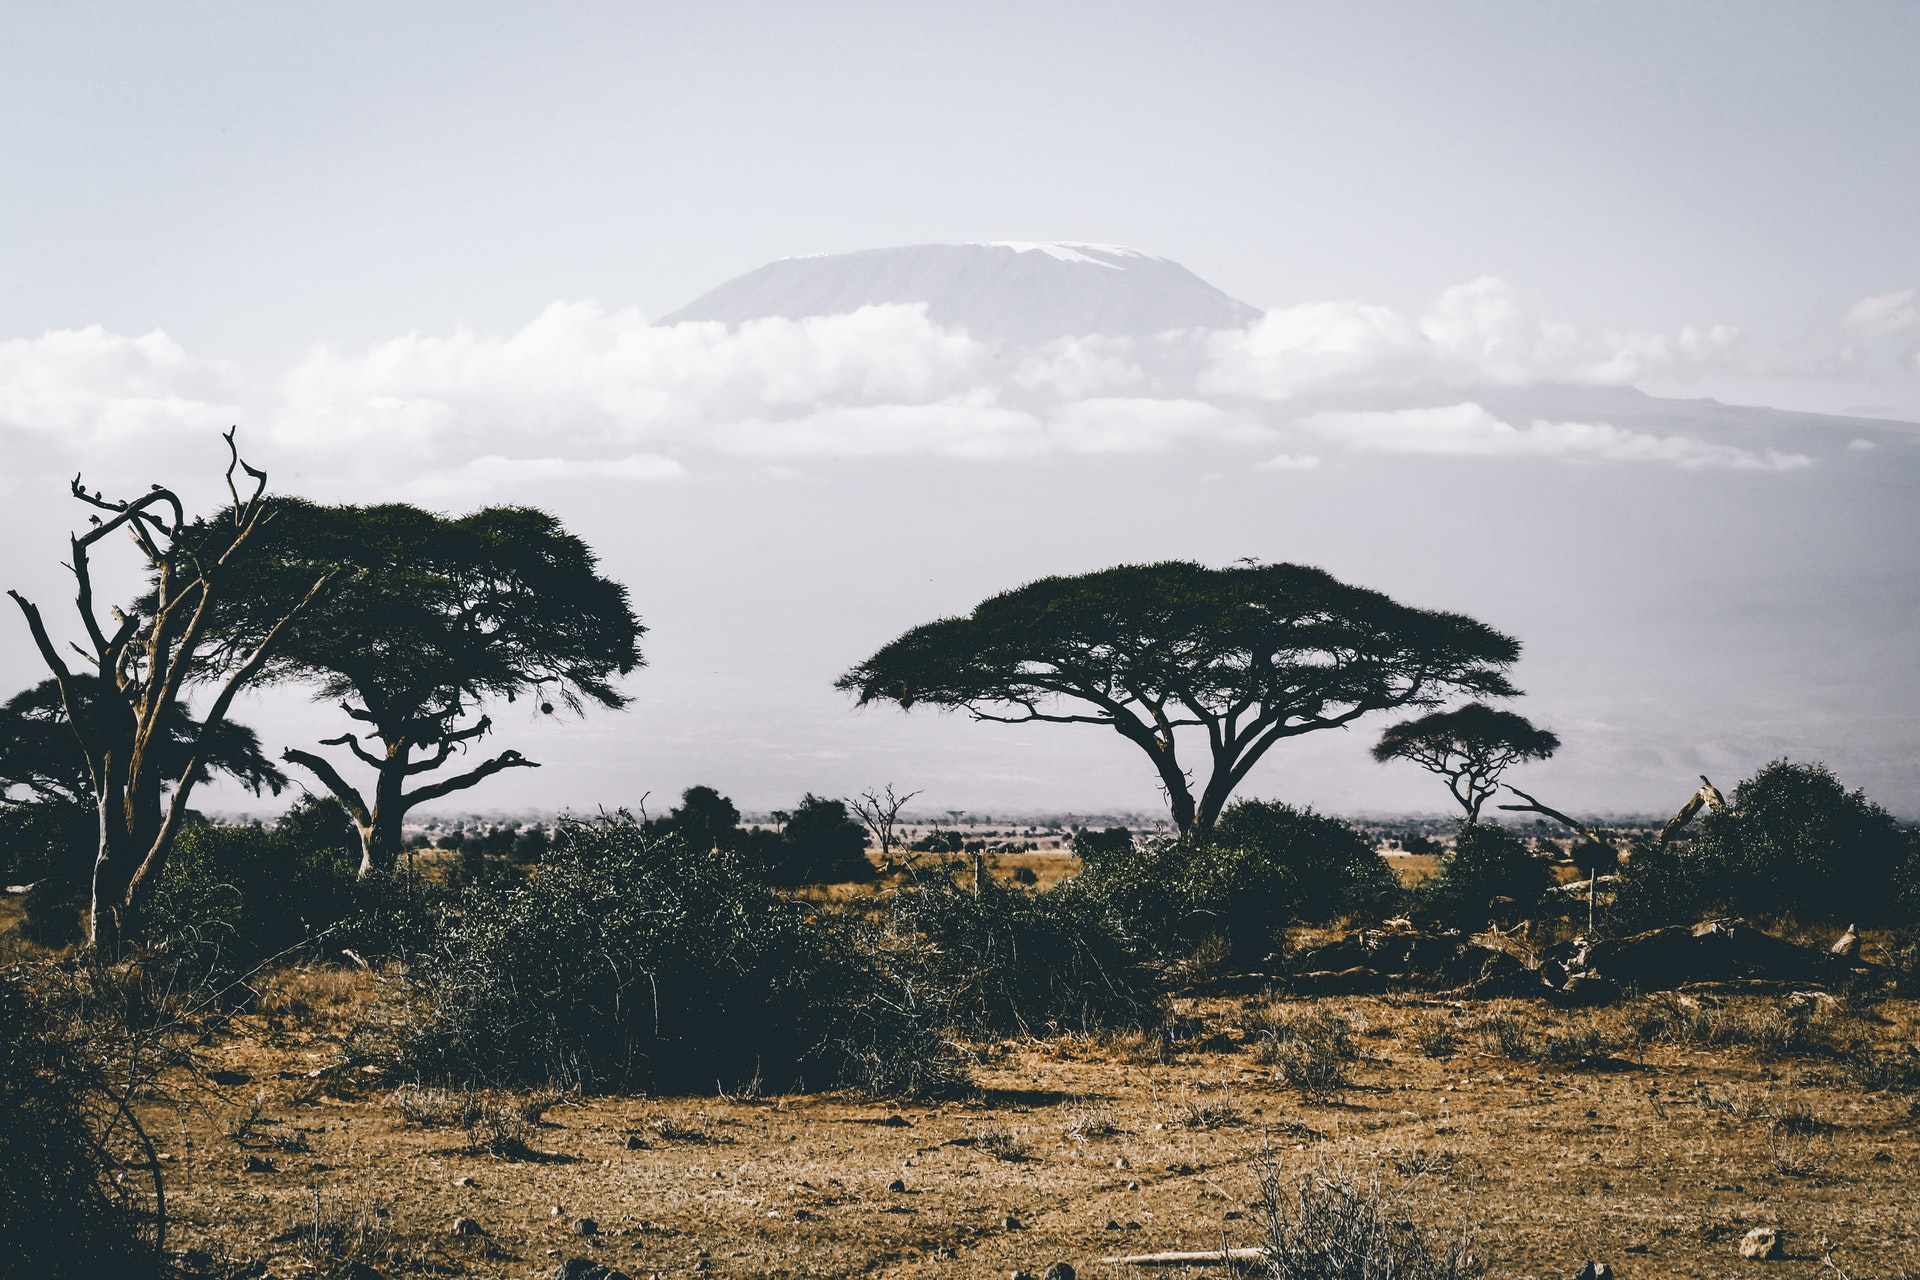

In [16]:
im

------------------------------------------------------------------------

## How To Compress A Single Image In Python

In [17]:
file_name = 'image-1-compressed.jpg'
picture = Image.open('image-1.jpg')
dim = picture.size
print(f"This is the current width and height of the image: {dim}")

This is the current width and height of the image: (1920, 1280)


--------------------------------------------------------------------

You will then need to select the specific quality of image from 0 - 100:
A quality of 85 doesn't make much difference for 5 - 6mb files, and [shantanujoshi](https://gist.github.com/ShantanuJoshi/44e9b72a985d5d6b4e8df2810ce5d25e') found that 65 for the quality argument is the lowest reasonable number.

In [18]:
picture.save("Compressed_"+file_name,optimize=True,quality=30) 

However, I tried with the quality set at 30 and the two images still seemed similar in terms of image quality.

![](./Compressed_image-1-compressed.jpg)

------------------------------------------------------------------------------------------------------------

Comparing against the original:



![compressing both images](image-1.jpg)

------------------------------------------------------------------------------------

## How To Compress Multiple Images In The Current Working Directory

We will use Python's OS package to find and compress every image within the current working directory:

------------------------------------

<strong> For this example, you can download three images from [pexels](https://www.pexels.com/photo/woman-wearing-white-mesh-top-2982149/) and put them inside of your current working directory. 

Make sure to include "example" in every images file name:
    
</strong>

In [19]:
print(f"The current working directory: {os.getcwd()} ")

The current working directory: /Users/jamesaphoenix/Desktop/justunderstandingdata/personal_projects/Python_For_SEO/Course/7_image_compression 


In [20]:
images = [file for file in os.listdir() if file.endswith(('jpg', 'png' )) and "example" in file]

In [21]:
print(f" Example images: {images}")

 Example images: ['example-image.jpg', 'example-image-3.jpg', 'example-image-2.jpg']


In [22]:
# How to get the image name:
for image in images:
    print(image.split('.')[0])

example-image
example-image-3
example-image-2


In [23]:
for image in images:
    # 1. Open the image
    img = Image.open(image)
    
    # 2. Compressing the image
    img.save("Compressed_and_resized_"+image,
             optimize=True,
             quality=30)

------------------------------------------------------------------------------------------------

## How To Compress Multiple Images In A Specific File Directory

Okay great, hopefully you can now see how easy it is to compress multiple file images using Python! 

Let's do one more example, where we will change into a specific directory, extract all of the jpg and png files.

Then we will compress every image using Pillow.

In [24]:
def compress_images(directory=False, quality=30):
    # 1. If there is a directory then change into it, else perform the next operations inside of the 
    # current working directory:
    if directory:
        os.chdir(directory)
        
    # 2. Extract all of the .png and .jpeg files:
    files = os.listdir()
    
    # 3. Extract all of the images:
    images = [file for file in files if file.endswith(('jpg', 'png'))]
    
    # 4. Loop over every image:
    for image in images:
        
        print(image)
        
        # 5. Open every image:
        img = Image.open(image)
        
        # 5. Compress every image and save it with a new name:
        img.save("Compressed_and_resized_with_function_"+image, optimize=True, quality=quality)

---------------------------------------------

The above function will by default run in the current working directory, however if we pass an exact directory path to it as the first argument, then we will change into that directory and perform the image compression on all .png and .jpg images there!

In [25]:
!pwd

/Users/jamesaphoenix/Desktop/justunderstandingdata/personal_projects/Python_For_SEO/Course/7_image_compression


In [26]:
!ls

Compressed_and_resized_example-image-2.jpg
Compressed_and_resized_example-image-3.jpg
Compressed_and_resized_example-image.jpg
Compressed_image-1-compressed.jpg
example-image-2.jpg
example-image-3.jpg
example-image.jpg
how-to-compress-single-and-multiple-images-starter-code.ipynb
how-to-compress-single-and-multiple-images.ipynb
image-1.jpg
subdirectory


In [27]:
subdirectory_path = 'subdirectory/'
print(subdirectory_path)

subdirectory/


In [28]:
compress_images(directory=subdirectory_path)

test-image-in-subdirectory.jpg


In the next tutorial, you'll learn how to resize single images, multiple images and will then combine this with image compression to do your image processing at scale using python!